In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)  
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.38%


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from collections import Counter  
import os  

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC  

In [4]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'] = data['Outcome'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
Diabetic,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
Non-Diabetic,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


In [8]:
data.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())   
  
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
  
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  

data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,Diabetic
1,1,85,66,29.000000,79.799479,26.6,0.351,31,Non-Diabetic
2,8,183,64,20.536458,79.799479,23.3,0.672,32,Diabetic
3,1,89,66,23.000000,94.000000,28.1,0.167,21,Non-Diabetic
4,0,137,40,35.000000,168.000000,43.1,2.288,33,Diabetic


Text(0.5, 1.0, 'Correlation heatmap')

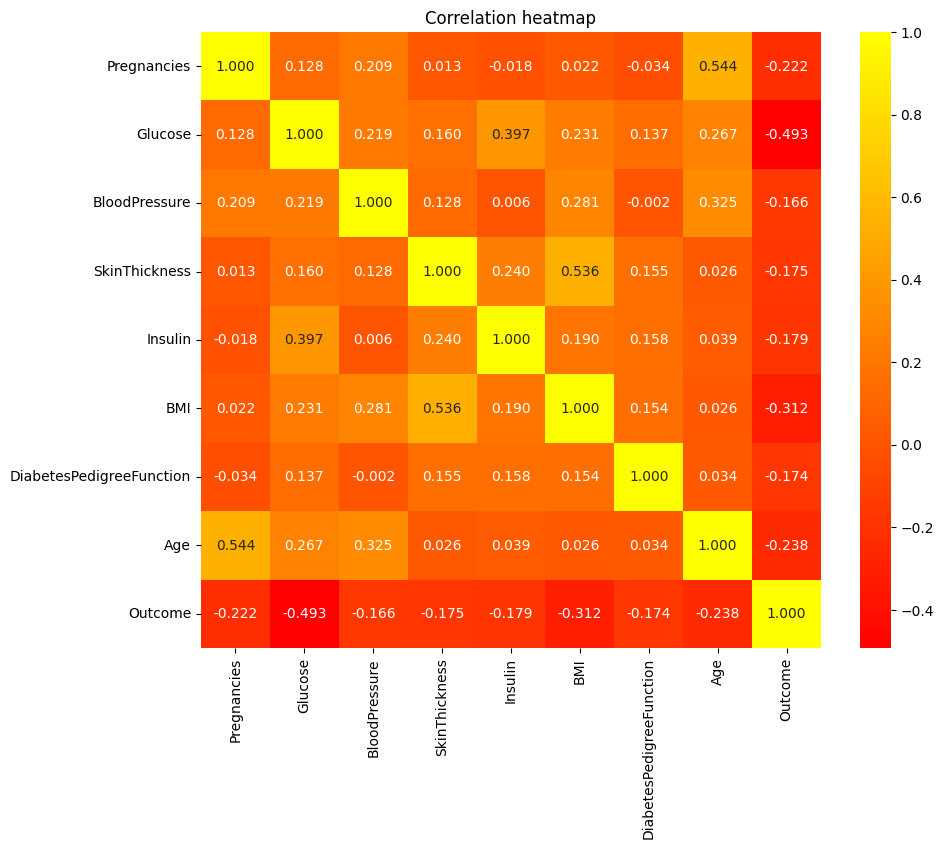

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Outcome'] = label_encoder.fit_transform(data['Outcome'])

plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "autumn")  
plt.title("Correlation heatmap")  

In [11]:
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)  
def cv_model(models):  
   
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result  

,CrossValMean,CrossValStd,Model List
0,0.697921,0.067773,DecisionTreeClassifier
1,0.780358,0.085376,LogisticRegression
2,0.782437,0.069578,SVC
3,0.686882,0.050551,AdaBoostClassifier
4,0.765018,0.076466,GradientBoostingClassifier
5,0.752115,0.087273,RandomForestClassifier
6,0.739283,0.043985,KNeighborsClassifier


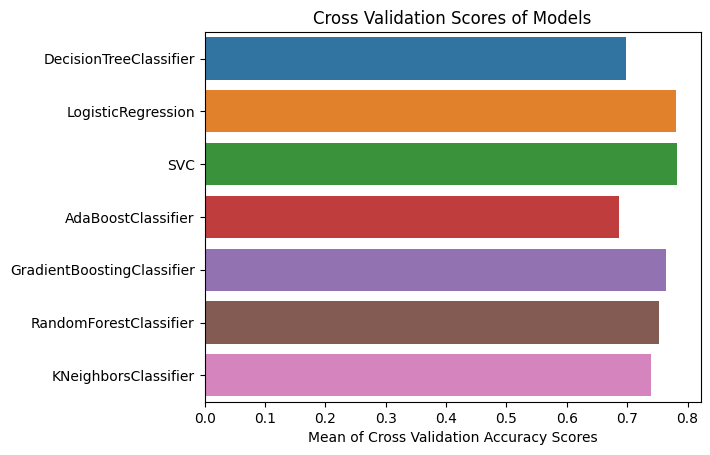

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

state = 20
models_list = [
    DecisionTreeClassifier(random_state=state),
    LogisticRegression(random_state=state, solver='liblinear'),
    SVC(random_state=state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state=state), random_state=state, learning_rate=0.3),
    GradientBoostingClassifier(random_state=state),
    RandomForestClassifier(random_state=state),
    KNeighborsClassifier()
]
cv_model(models_list)

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

Y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_pred)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7782608695652173


In [14]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7597402597402597


In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

from sklearn.preprocessing import StandardScaler

input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

input_data_as_numpy_array = np.asarray(input_data)

std_data = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(std_data)

prediction = classifier.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic


In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

from sklearn.preprocessing import StandardScaler

input_data = (4, 120, 68, 29, 130, 32.1, 0.479, 33)

input_data_as_numpy_array = np.asarray(input_data)

std_data = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(std_data)

prediction = classifier.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic


In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

from sklearn.preprocessing import StandardScaler

input_data = input_data = (3, 110, 60, 10, 100, 22.5, 0.325, 30)


input_data_as_numpy_array = np.asarray(input_data)

std_data = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(std_data)

prediction = classifier.predict(std_data)

if prediction[0] == 1:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is not diabetic
